In [34]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [35]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [36]:

tesla = yf.Ticker("TSLA")

tesla_data = tesla.history(period="max")

tesla_data = pd.DataFrame(tesla_data)

tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [37]:
def make_graph(stock_data, revenue_data, stock_name):
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots

    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        vertical_spacing=0.1, subplot_titles=("Stock Price", "Revenue"))
    
    # Add stock price trace
    fig.add_trace(
        go.Scatter(x=stock_data.index, y=stock_data['Close'], name="Stock Price"),
        row=1, col=1
    )

    # Add revenue trace
    fig.add_trace(
        go.Scatter(x=revenue_data['Date'], y=revenue_data['Revenue'], name="Revenue"),
        row=2, col=1
    )
    
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)

    # Fix the title issue by passing the stock name as a string
    fig.update_layout(
        showlegend=False,
        height=900,
        title=str(stock_name),  # Ensure stock_name is a string
        xaxis_rangeslider_visible=True
    )
    fig.show()


In [44]:
tesla = yf.Ticker("TSLA")

tesla_data = tesla.history(period="max")

tesla_data = pd.DataFrame(tesla_data)
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [39]:
url = ' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

data  = requests.get(url).text

soup = BeautifulSoup(data, 'html.parser')

tesla_revenue = pd.DataFrame(columns= ['Date' , 'Revenue'])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Revenue = col[1].text

    
    # Finally we append the data of each row to the table
    tesla_revenue = pd.concat([tesla_revenue,pd.DataFrame({"Date":[date], "Revenue":[Revenue]})], ignore_index=True)    

tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)

tesla_revenue.tail()

<>:18: SyntaxWarning:

invalid escape sequence '\$'

<>:18: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\pc\AppData\Local\Temp\ipykernel_16140\1483817174.py:18: SyntaxWarning:

invalid escape sequence '\$'



,Date,Revenue
8,2013,2013.0
9,2012,413.0
10,2011,204.0
11,2010,117.0
12,2009,112.0


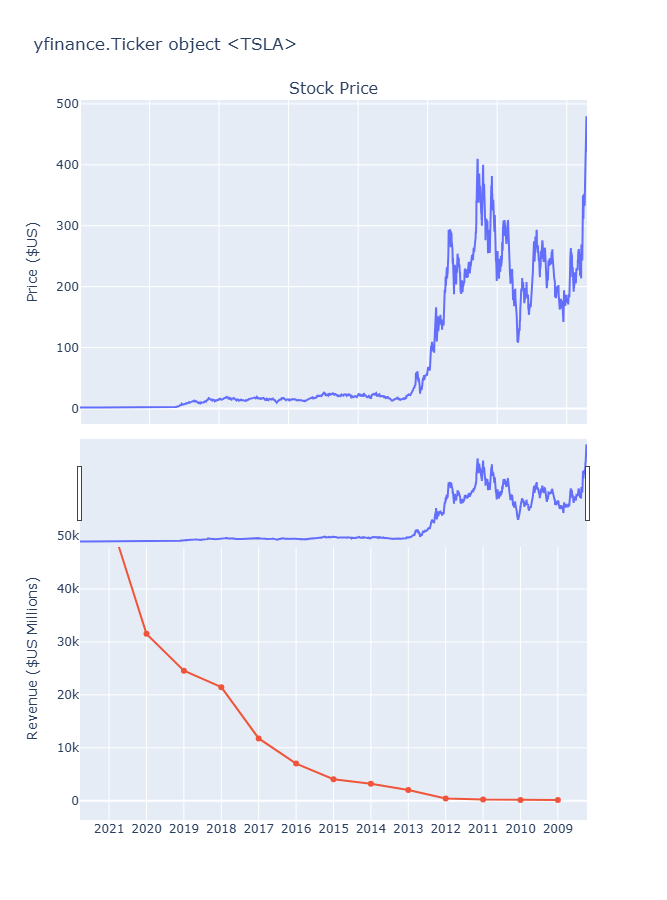

In [40]:
make_graph(tesla_data, tesla_revenue, tesla)

In [41]:
gme  = yf.Ticker('GME')

gme_data = gme.history(period="max")

tesla_data = pd.DataFrame(tesla_data)

tesla_data.head()

url = ' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

gme_data  = requests.get(url).text

gme_soup = BeautifulSoup(gme_data, 'html.parser')

gme_revenue = pd.DataFrame(columns= ['Date' , 'Revenue'])

for row in gme_soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Revenue = col[1].text

    
    # Finally we append the data of each row to the table
    gme_revenue = pd.concat([gme_revenue,pd.DataFrame({"Date":[date], "Revenue":[Revenue]})], ignore_index=True)    

gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)
gme_revenue.tail()

<>:26: SyntaxWarning:

invalid escape sequence '\$'

<>:26: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\pc\AppData\Local\Temp\ipykernel_16140\151210078.py:26: SyntaxWarning:

invalid escape sequence '\$'



,Date,Revenue
11,2009,8806.0
12,2008,7094.0
13,2007,5319.0
14,2006,3092.0
15,2005,1843.0


In [51]:
make_graph(gme_data, gme_revenue, gme)

TypeError: string indices must be integers, not 'str'